# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [ ]:
! pip install Pillow

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [ ]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 28.69 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
!ls MNIST

processed  raw


In [ ]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [ ]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

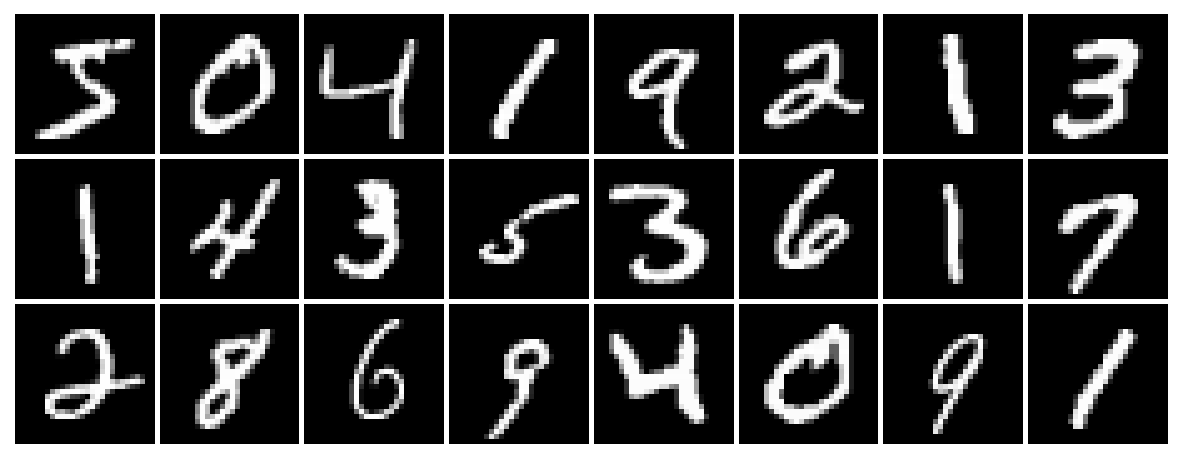

In [ ]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


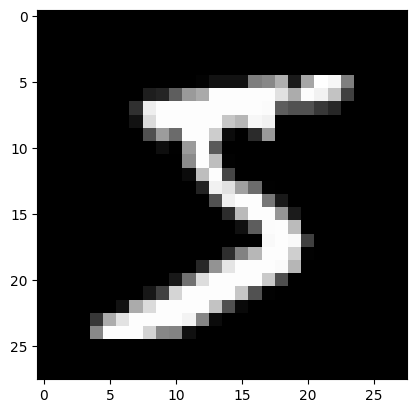

In [ ]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [ ]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [ ]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 0.0192, -0.2253, -0.0596,  0.1530, -0.0271,  0.0811, -0.2750,  0.0073,
         -0.4678, -0.0011],
        [ 0.1098, -0.3054, -0.0678,  0.2727, -0.0585, -0.1233, -0.1805,  0.2496,
         -0.0861, -0.0476],
        [-0.1404,  0.0676, -0.1116, -0.0990,  0.0024, -0.0457,  0.1430,  0.0725,
         -0.4126, -0.0496],
        [ 0.1785,  0.0436,  0.0717,  0.1756, -0.1201,  0.2583, -0.2237,  0.2040,
         -0.1426,  0.0193],
        [-0.0199, -0.1612, -0.0116,  0.1422, -0.0917,  0.1942, -0.5138,  0.2878,
         -0.0423,  0.1042]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [ ]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [ ]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.6 MB/s eta 0:00:00
  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-ju30i4cp
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-ju30i4cp
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=5038 sha256=3d7bcb3632209e178270aa79d0f6b4e710f41c1d3f5fc6bc6af189067e2f6710
  Stored in directory: /tmp/pip-ephem-wheel-cache-mmz66kpx/wheels/8a/88/98/69bcb99aba99a6bba9b2b81439cbda0101df40c49e639c4216
Successfully built torchviz


In [ ]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3154, grad_fn=<NllLossBackward0>)

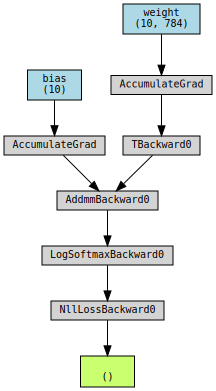

In [ ]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [ ]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


In [ ]:
print('Final loss:', loss.item())

Final loss: 0.26575955748558044


### Visualizando gráfico de perda durante o treinamento

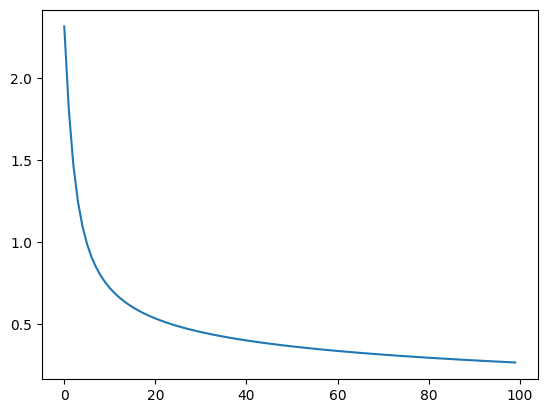

In [ ]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [ ]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.941


### Matriz de confusão com dados de treinamento e teste

In [ ]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,2,0,0,0,2,3,1,0
2,0,1,90,1,0,1,0,1,1,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,2,0,2,0,3
5,0,2,0,1,0,81,0,0,2,1
6,1,0,1,1,2,2,91,0,0,0
7,0,1,1,1,0,0,0,110,0,3
8,0,2,2,0,0,2,0,0,83,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


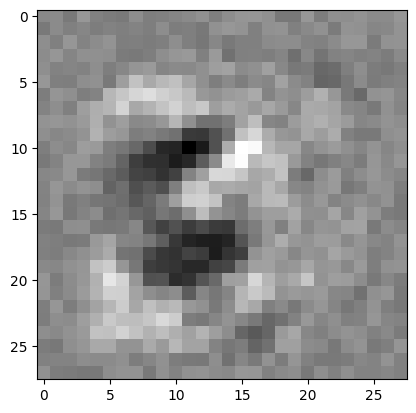

In [ ]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

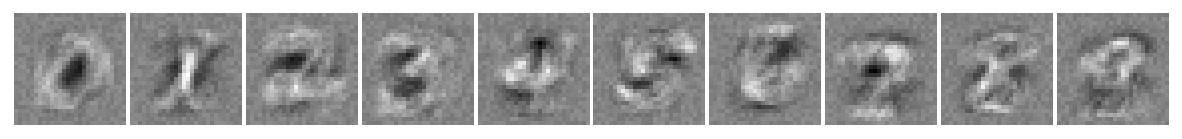

In [ ]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

In [ ]:
model2 = torch.nn.Linear(28*28,10)
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model2.parameters(), lr=learningRate)


losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model2(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    print('Época[{}/{}], loss: {:.3f}, acc: {:.3f}'.format(i + 1,epochs,loss.data,accuracy))


Época[1/100], loss: 2.292, acc: 0.122
Época[2/100], loss: 1.794, acc: 0.628
Época[3/100], loss: 1.463, acc: 0.745
Época[4/100], loss: 1.245, acc: 0.778
Época[5/100], loss: 1.096, acc: 0.799
Época[6/100], loss: 0.988, acc: 0.815
Época[7/100], loss: 0.908, acc: 0.822
Época[8/100], loss: 0.846, acc: 0.827
Época[9/100], loss: 0.796, acc: 0.838
Época[10/100], loss: 0.755, acc: 0.845
Época[11/100], loss: 0.720, acc: 0.849
Época[12/100], loss: 0.691, acc: 0.856
Época[13/100], loss: 0.665, acc: 0.859
Época[14/100], loss: 0.642, acc: 0.865
Época[15/100], loss: 0.622, acc: 0.865
Época[16/100], loss: 0.604, acc: 0.869
Época[17/100], loss: 0.587, acc: 0.870
Época[18/100], loss: 0.572, acc: 0.873
Época[19/100], loss: 0.559, acc: 0.873
Época[20/100], loss: 0.546, acc: 0.874
Época[21/100], loss: 0.534, acc: 0.878
Época[22/100], loss: 0.524, acc: 0.879
Época[23/100], loss: 0.513, acc: 0.883
Época[24/100], loss: 0.504, acc: 0.885
Época[25/100], loss: 0.495, acc: 0.886
Época[26/100], loss: 0.487, acc: 0

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

Época[1/100]
weights: torch.Size([10, 784])


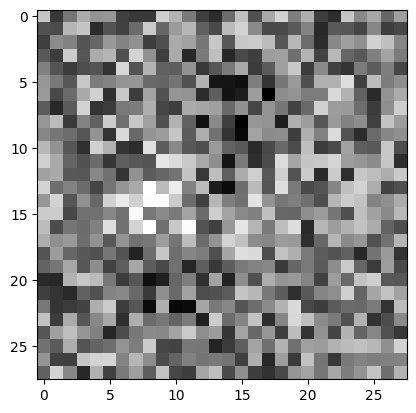

Época[2/100]
weights: torch.Size([10, 784])


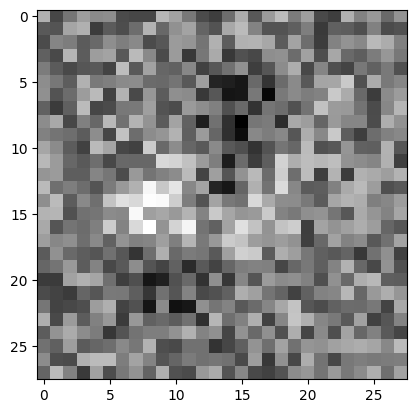

Época[3/100]
weights: torch.Size([10, 784])


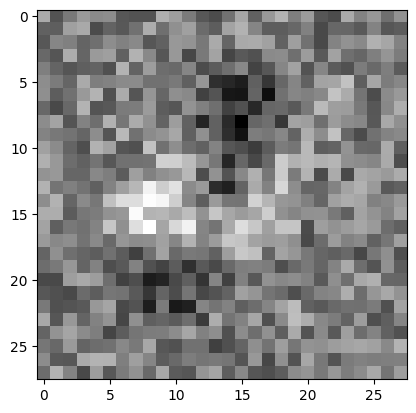

Época[4/100]
weights: torch.Size([10, 784])


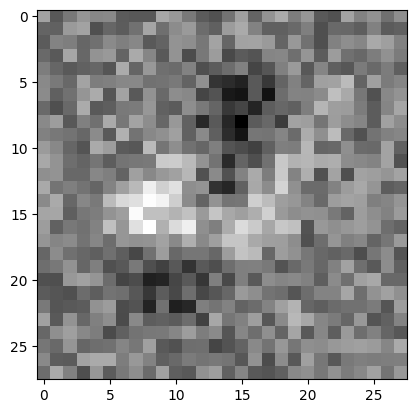

Época[5/100]
weights: torch.Size([10, 784])


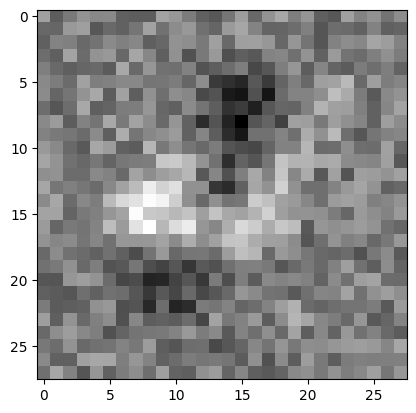

Época[6/100]
weights: torch.Size([10, 784])


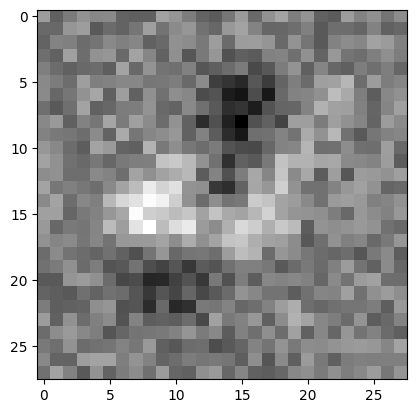

Época[7/100]
weights: torch.Size([10, 784])


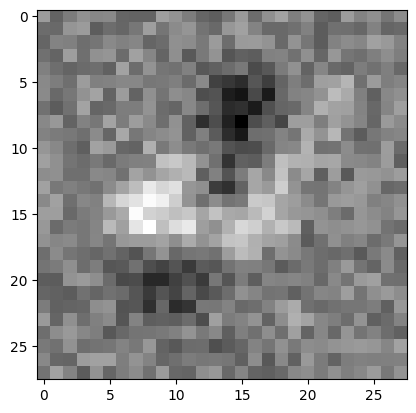

Época[8/100]
weights: torch.Size([10, 784])


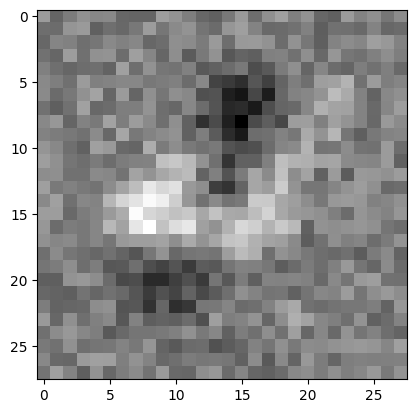

Época[9/100]
weights: torch.Size([10, 784])


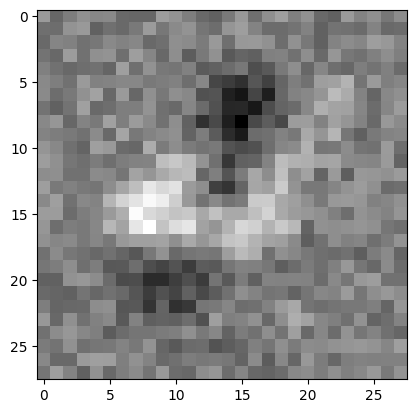

Época[10/100]
weights: torch.Size([10, 784])


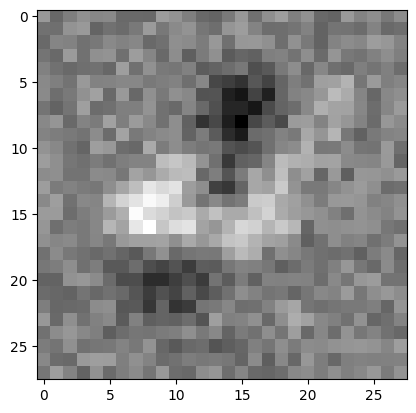

Época[11/100]
weights: torch.Size([10, 784])


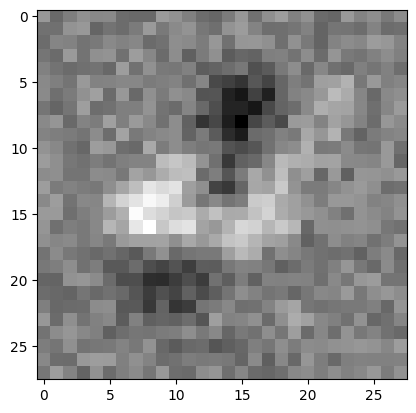

Época[12/100]
weights: torch.Size([10, 784])


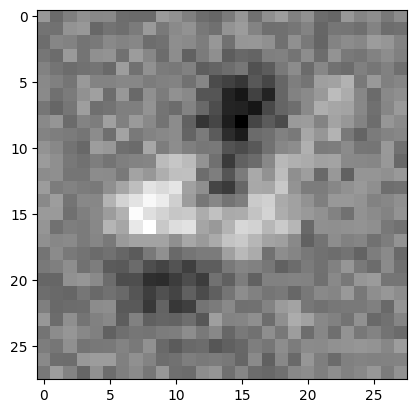

Época[13/100]
weights: torch.Size([10, 784])


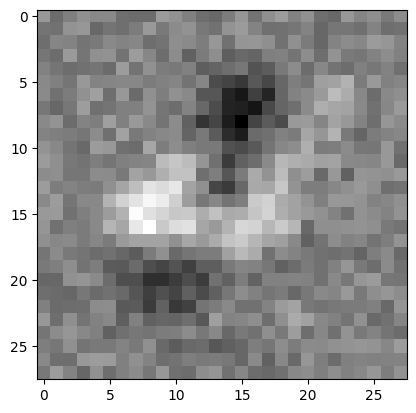

Época[14/100]
weights: torch.Size([10, 784])


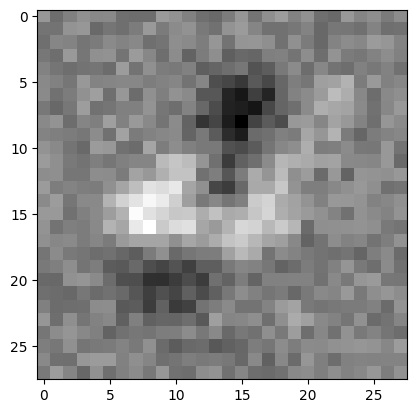

Época[15/100]
weights: torch.Size([10, 784])


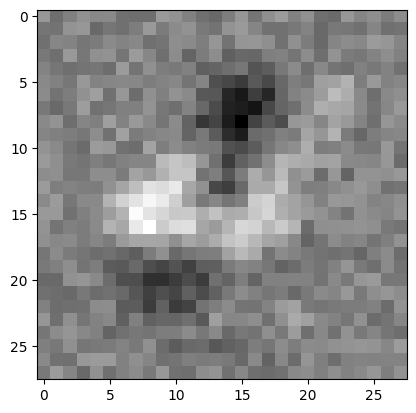

Época[16/100]
weights: torch.Size([10, 784])


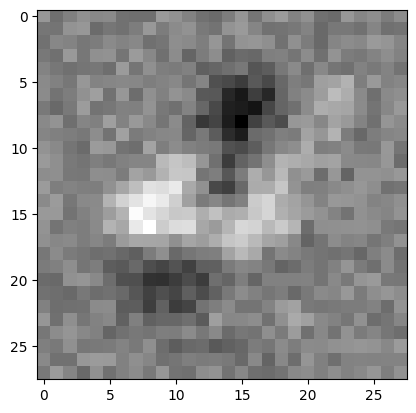

Época[17/100]
weights: torch.Size([10, 784])


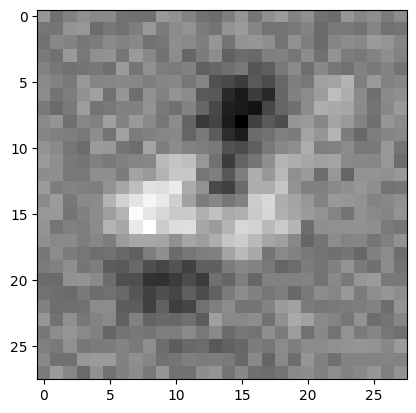

Época[18/100]
weights: torch.Size([10, 784])


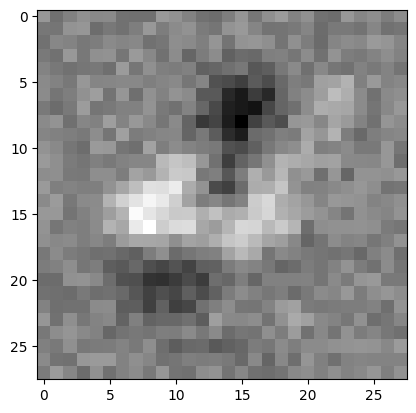

Época[19/100]
weights: torch.Size([10, 784])


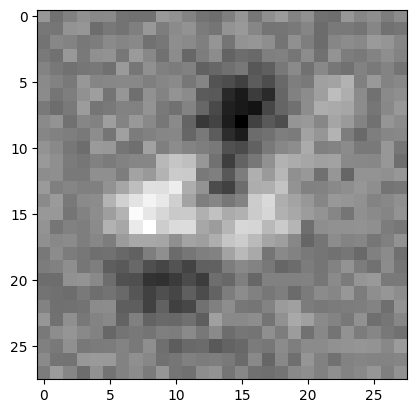

Época[20/100]
weights: torch.Size([10, 784])


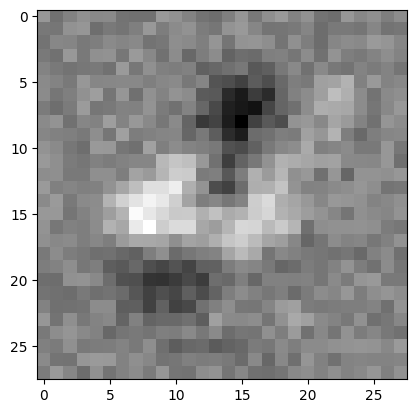

Época[21/100]
weights: torch.Size([10, 784])


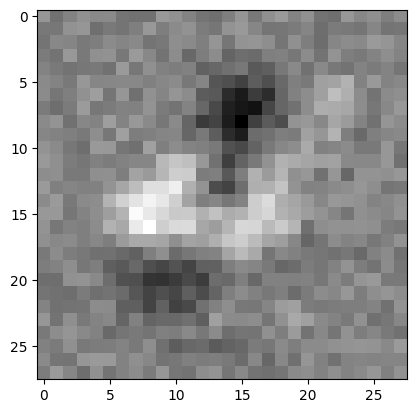

Época[22/100]
weights: torch.Size([10, 784])


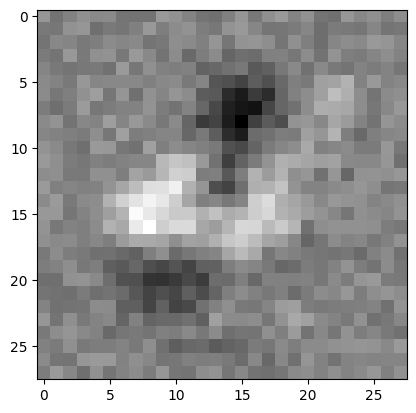

Época[23/100]
weights: torch.Size([10, 784])


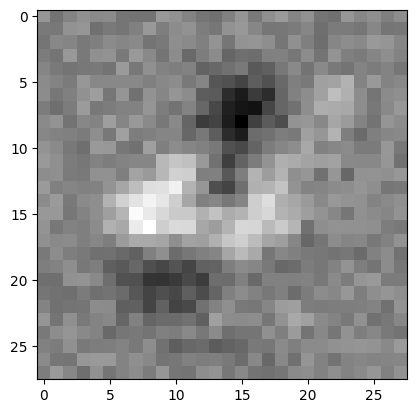

Época[24/100]
weights: torch.Size([10, 784])


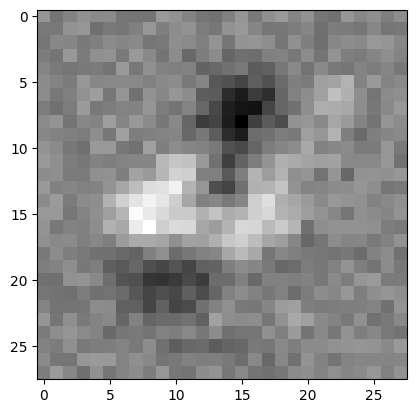

Época[25/100]
weights: torch.Size([10, 784])


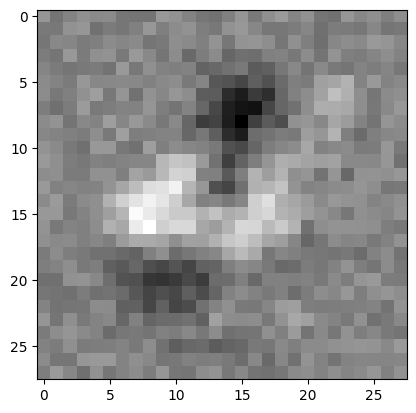

Época[26/100]
weights: torch.Size([10, 784])


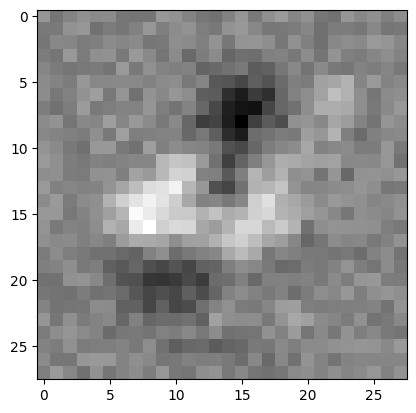

Época[27/100]
weights: torch.Size([10, 784])


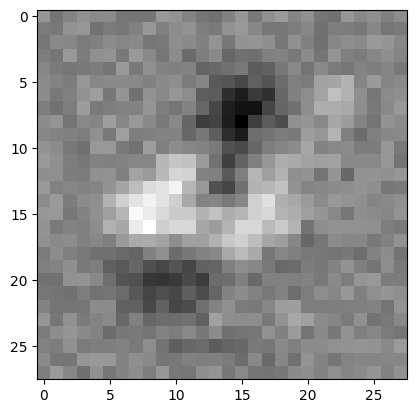

Época[28/100]
weights: torch.Size([10, 784])


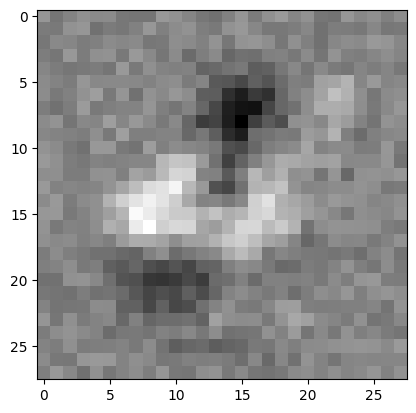

Época[29/100]
weights: torch.Size([10, 784])


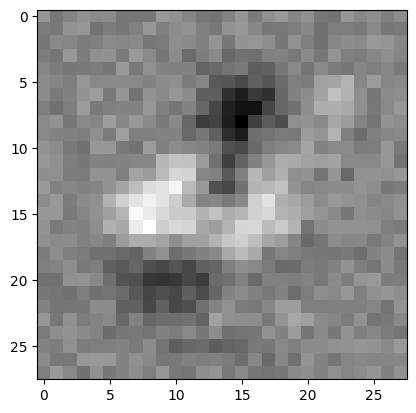

Época[30/100]
weights: torch.Size([10, 784])


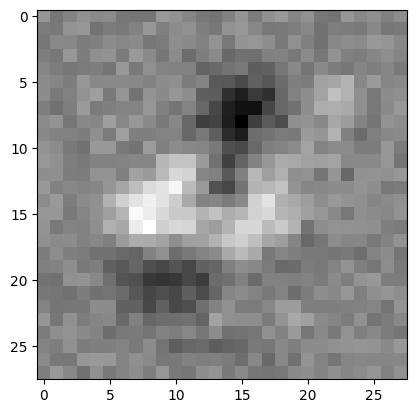

Época[31/100]
weights: torch.Size([10, 784])


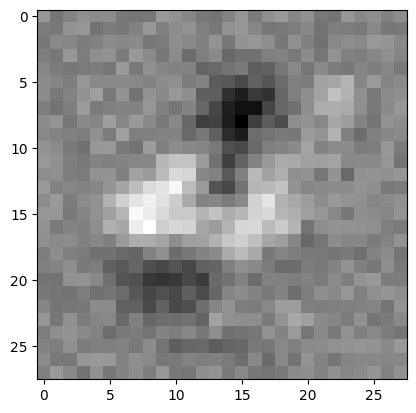

Época[32/100]
weights: torch.Size([10, 784])


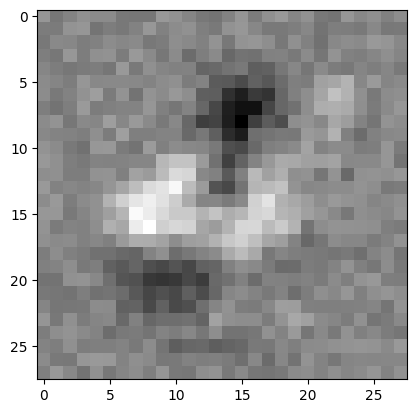

Época[33/100]
weights: torch.Size([10, 784])


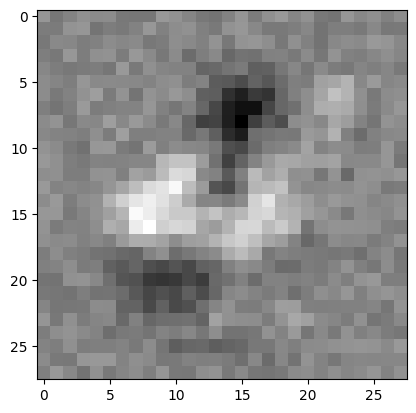

Época[34/100]
weights: torch.Size([10, 784])


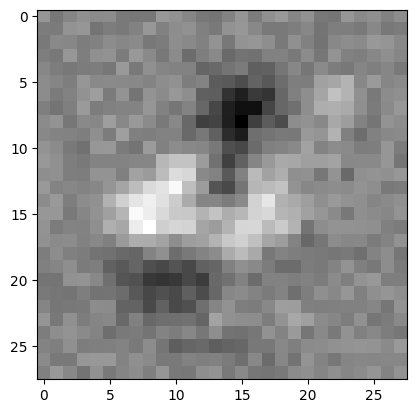

Época[35/100]
weights: torch.Size([10, 784])


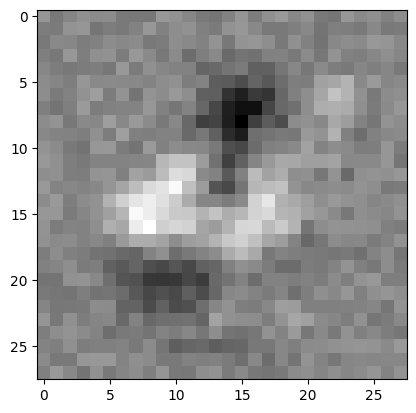

Época[36/100]
weights: torch.Size([10, 784])


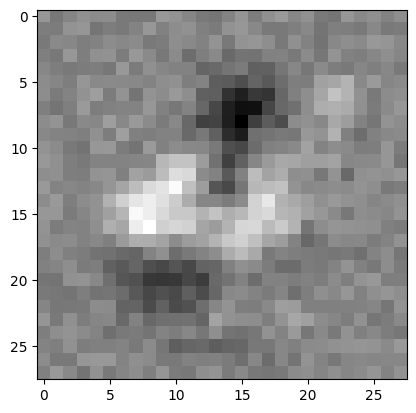

Época[37/100]
weights: torch.Size([10, 784])


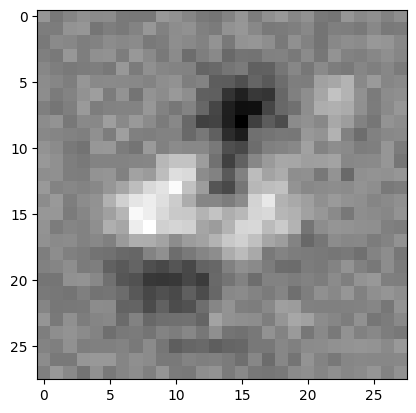

Época[38/100]
weights: torch.Size([10, 784])


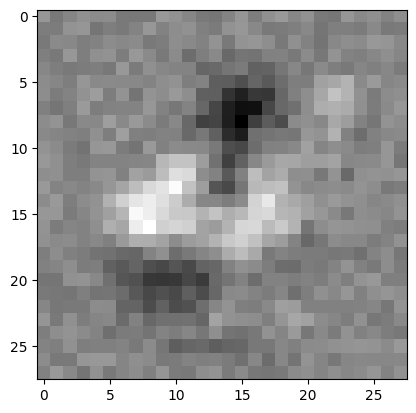

Época[39/100]
weights: torch.Size([10, 784])


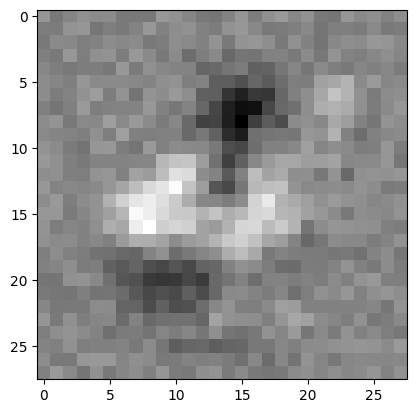

Época[40/100]
weights: torch.Size([10, 784])


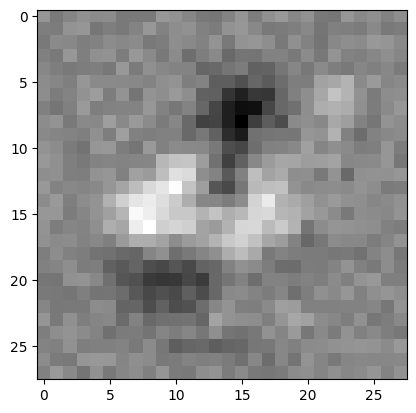

Época[41/100]
weights: torch.Size([10, 784])


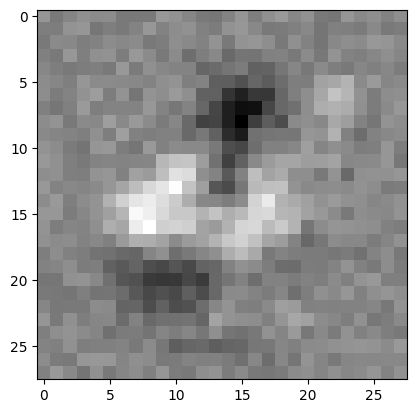

Época[42/100]
weights: torch.Size([10, 784])


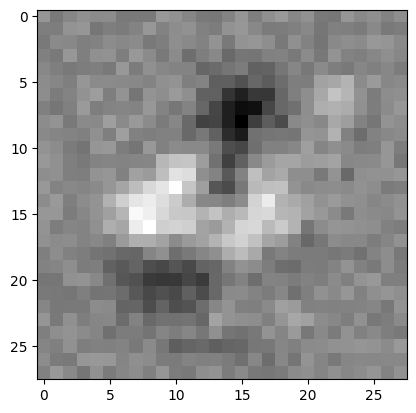

Época[43/100]
weights: torch.Size([10, 784])


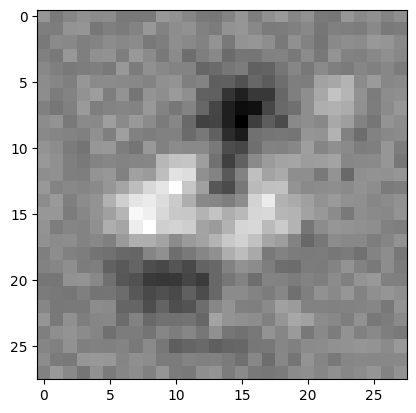

Época[44/100]
weights: torch.Size([10, 784])


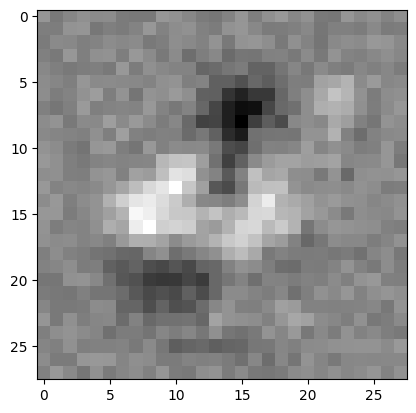

Época[45/100]
weights: torch.Size([10, 784])


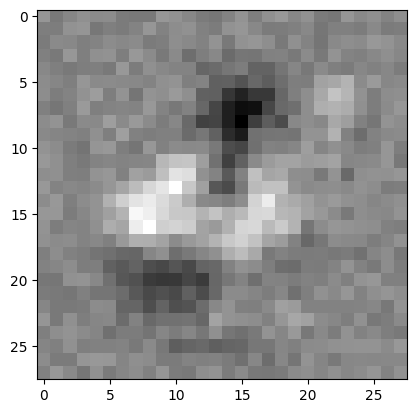

Época[46/100]
weights: torch.Size([10, 784])


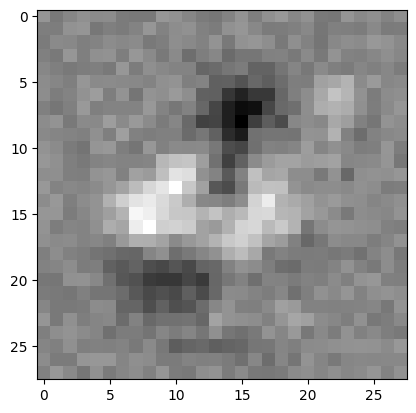

Época[47/100]
weights: torch.Size([10, 784])


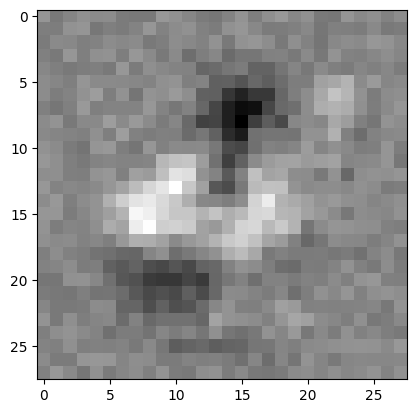

Época[48/100]
weights: torch.Size([10, 784])


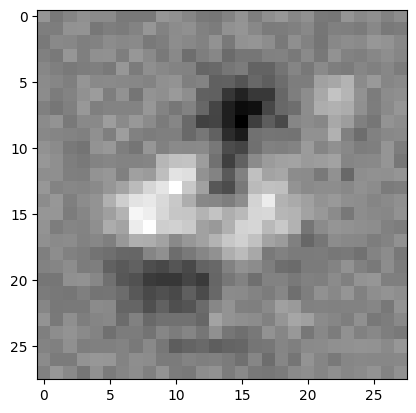

Época[49/100]
weights: torch.Size([10, 784])


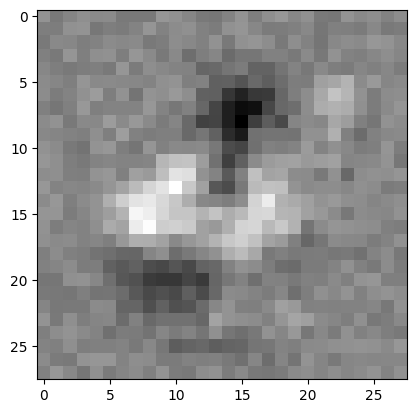

Época[50/100]
weights: torch.Size([10, 784])


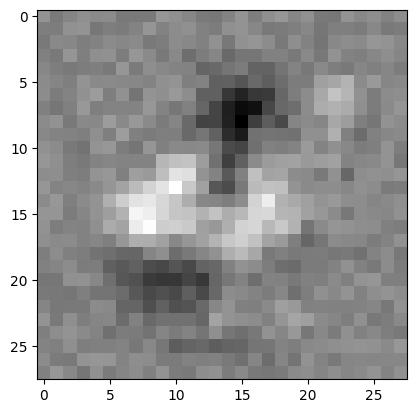

Época[51/100]
weights: torch.Size([10, 784])


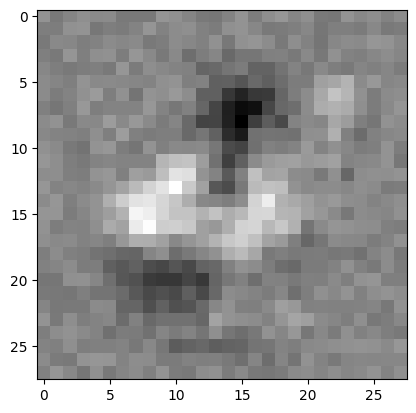

Época[52/100]
weights: torch.Size([10, 784])


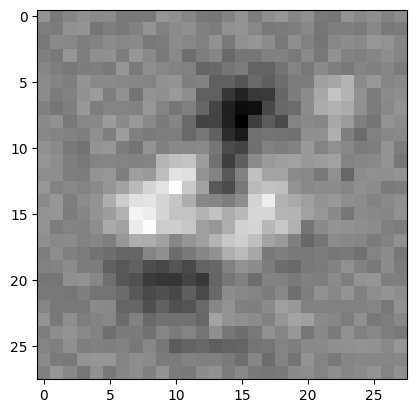

Época[53/100]
weights: torch.Size([10, 784])


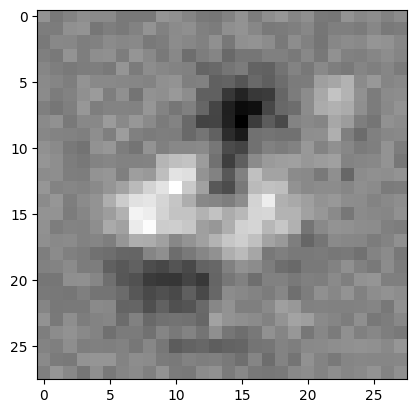

Época[54/100]
weights: torch.Size([10, 784])


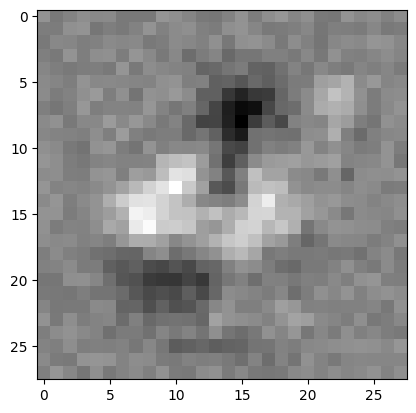

Época[55/100]
weights: torch.Size([10, 784])


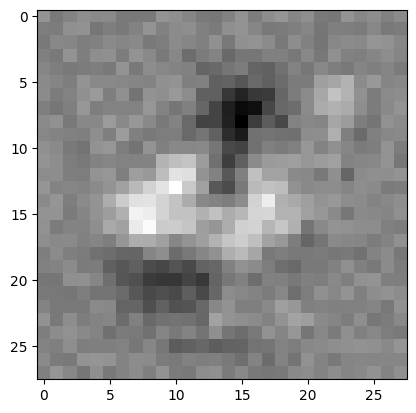

Época[56/100]
weights: torch.Size([10, 784])


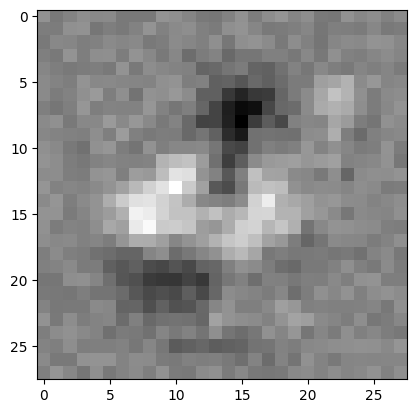

Época[57/100]
weights: torch.Size([10, 784])


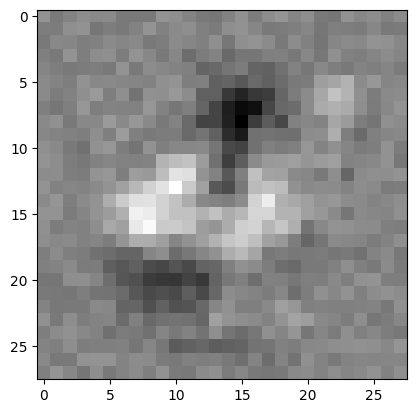

Época[58/100]
weights: torch.Size([10, 784])


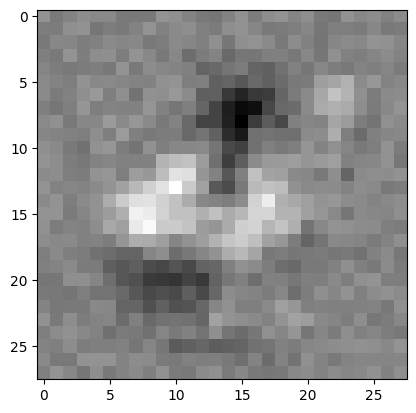

Época[59/100]
weights: torch.Size([10, 784])


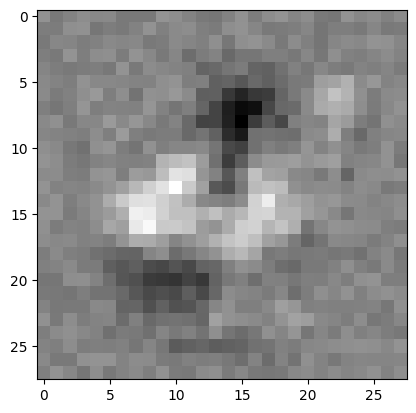

Época[60/100]
weights: torch.Size([10, 784])


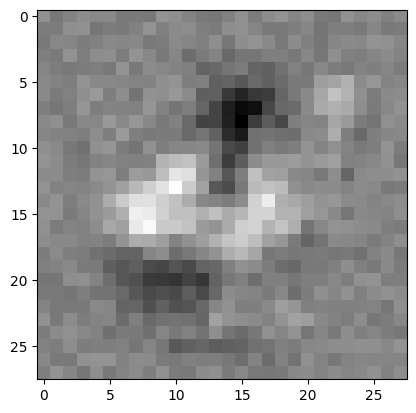

Época[61/100]
weights: torch.Size([10, 784])


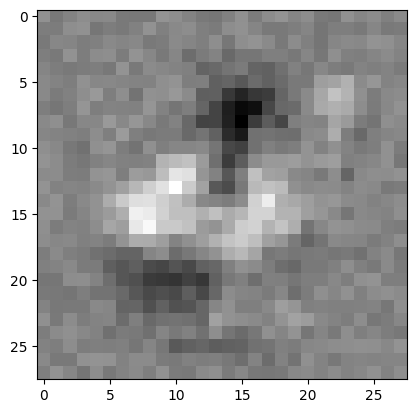

Época[62/100]
weights: torch.Size([10, 784])


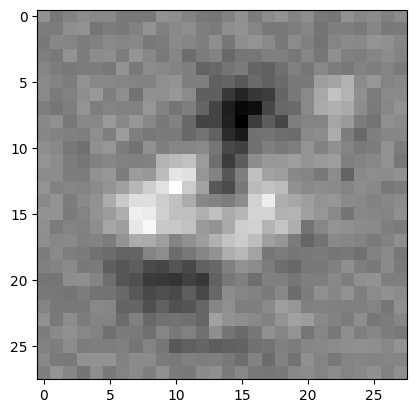

Época[63/100]
weights: torch.Size([10, 784])


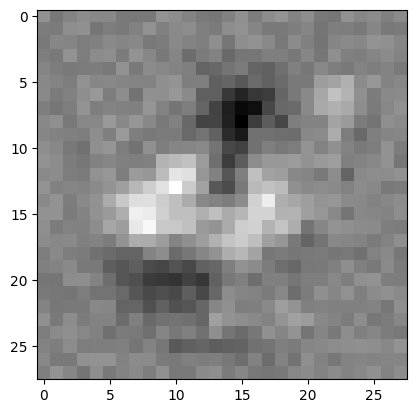

Época[64/100]
weights: torch.Size([10, 784])


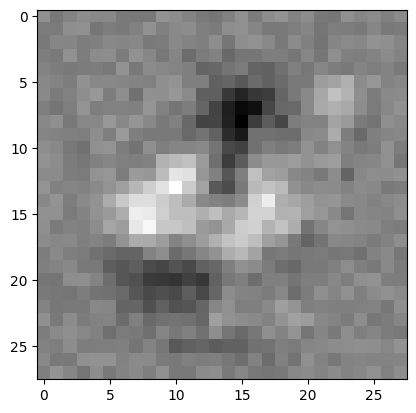

Época[65/100]
weights: torch.Size([10, 784])


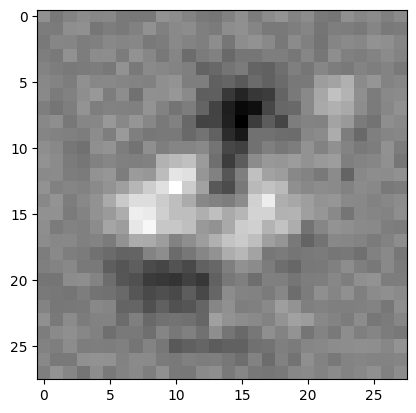

Época[66/100]
weights: torch.Size([10, 784])


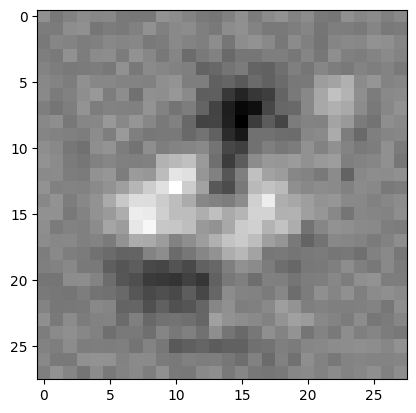

Época[67/100]
weights: torch.Size([10, 784])


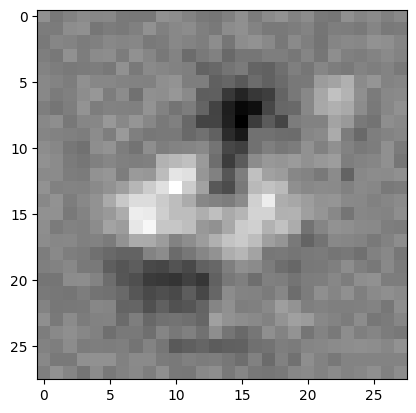

Época[68/100]
weights: torch.Size([10, 784])


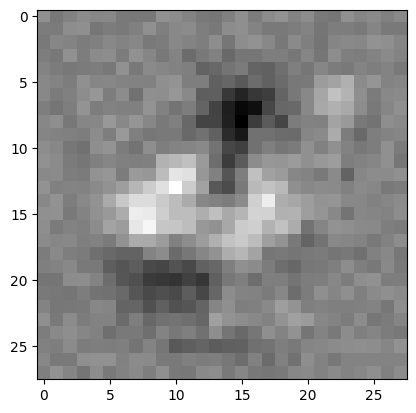

Época[69/100]
weights: torch.Size([10, 784])


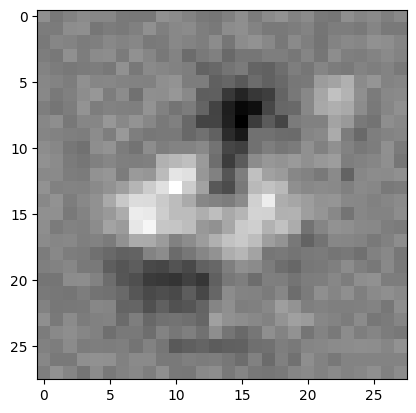

Época[70/100]
weights: torch.Size([10, 784])


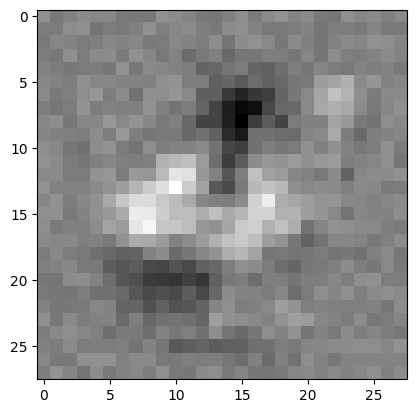

Época[71/100]
weights: torch.Size([10, 784])


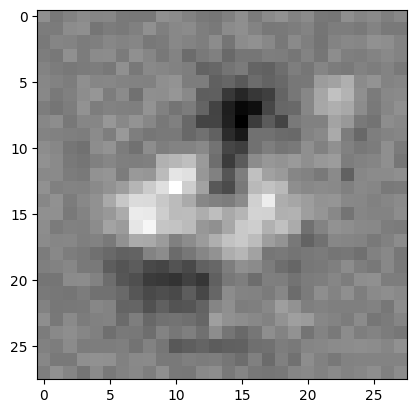

Época[72/100]
weights: torch.Size([10, 784])


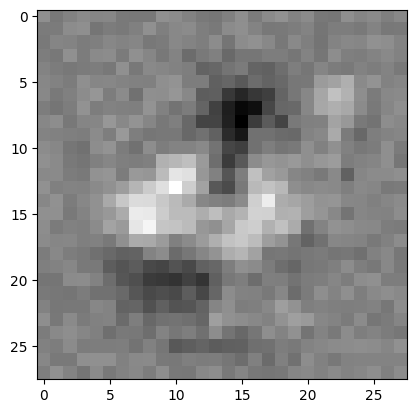

Época[73/100]
weights: torch.Size([10, 784])


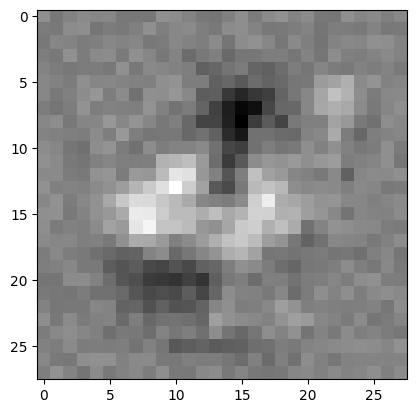

Época[74/100]
weights: torch.Size([10, 784])


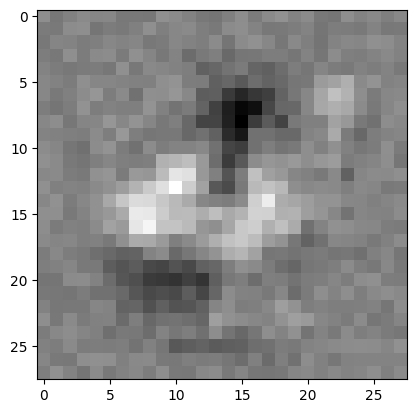

Época[75/100]
weights: torch.Size([10, 784])


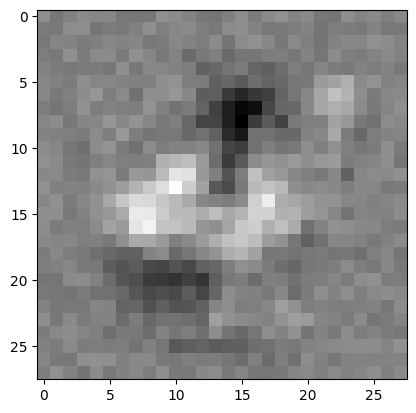

Época[76/100]
weights: torch.Size([10, 784])


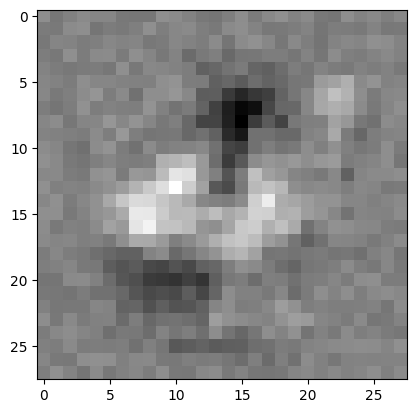

Época[77/100]
weights: torch.Size([10, 784])


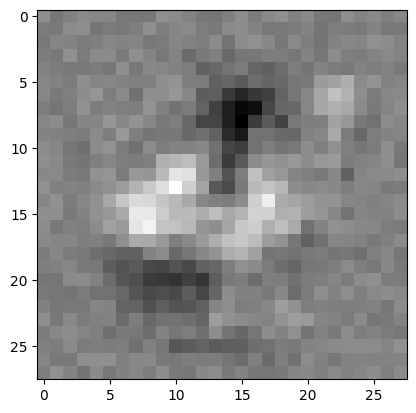

Época[78/100]
weights: torch.Size([10, 784])


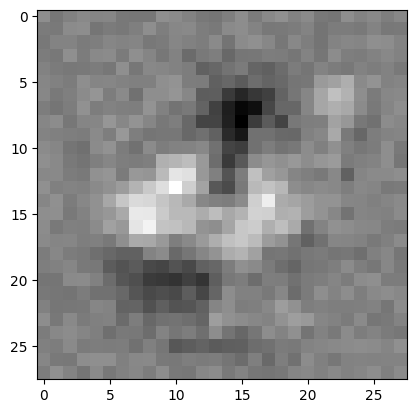

Época[79/100]
weights: torch.Size([10, 784])


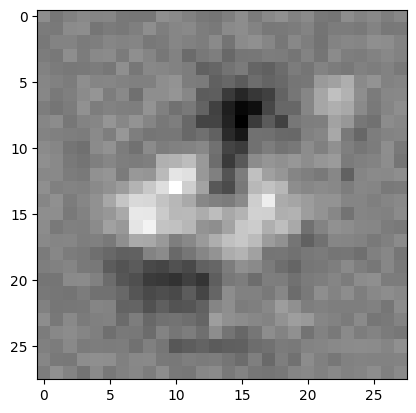

Época[80/100]
weights: torch.Size([10, 784])


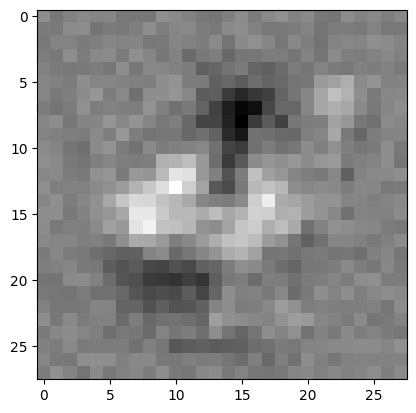

Época[81/100]
weights: torch.Size([10, 784])


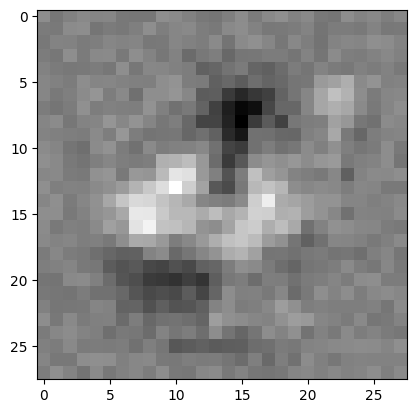

Época[82/100]
weights: torch.Size([10, 784])


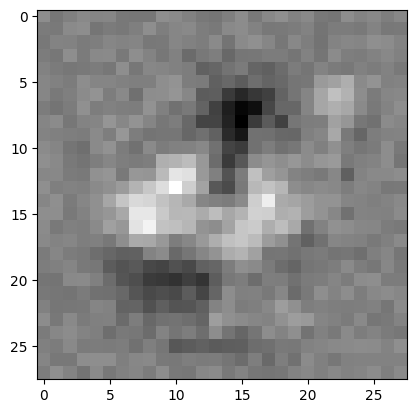

Época[83/100]
weights: torch.Size([10, 784])


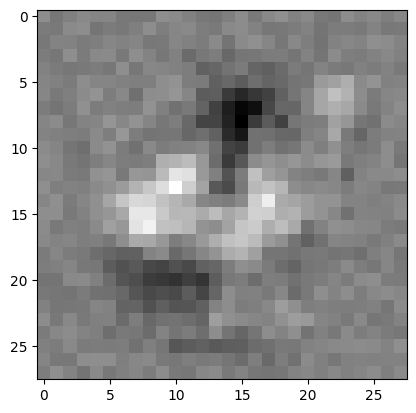

Época[84/100]
weights: torch.Size([10, 784])


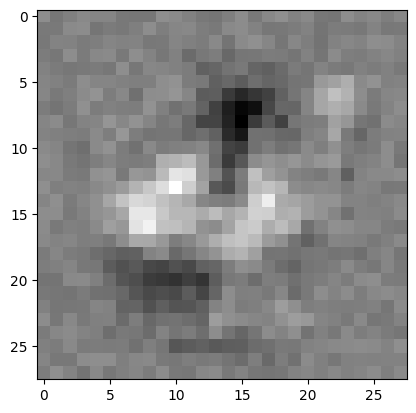

Época[85/100]
weights: torch.Size([10, 784])


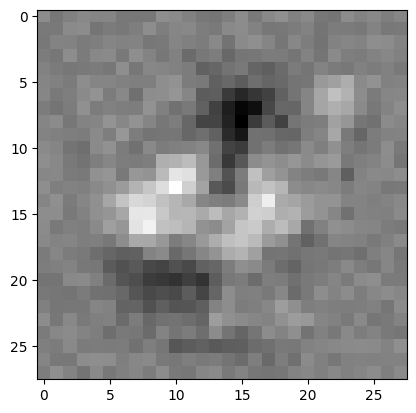

Época[86/100]
weights: torch.Size([10, 784])


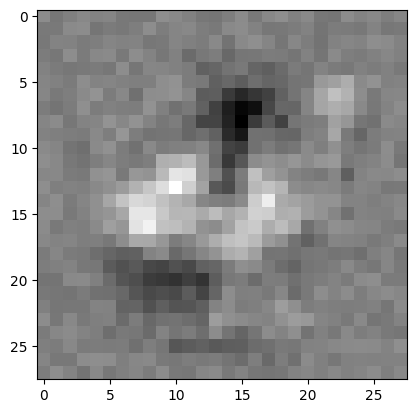

Época[87/100]
weights: torch.Size([10, 784])


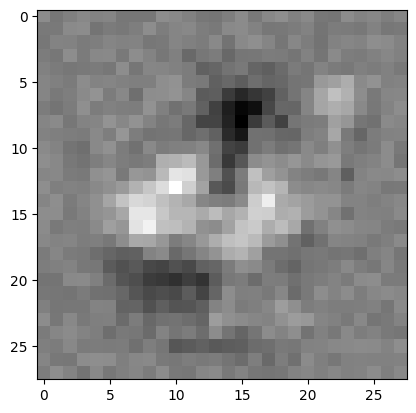

Época[88/100]
weights: torch.Size([10, 784])


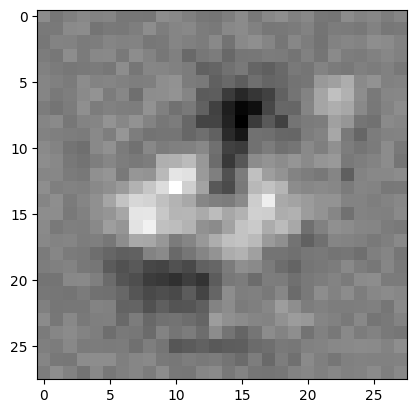

Época[89/100]
weights: torch.Size([10, 784])


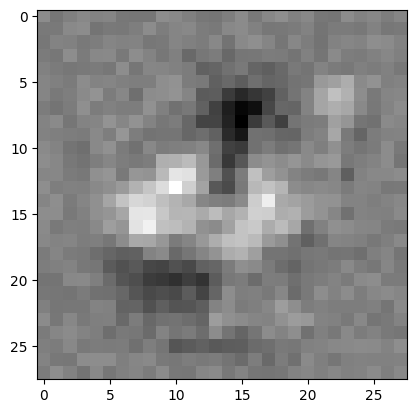

Época[90/100]
weights: torch.Size([10, 784])


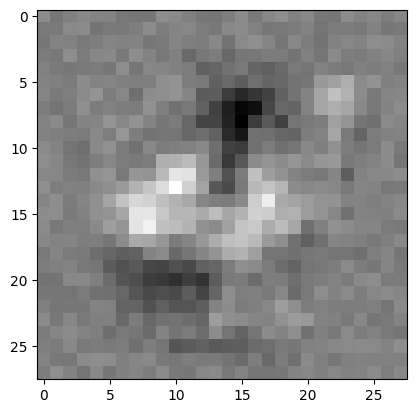

Época[91/100]
weights: torch.Size([10, 784])


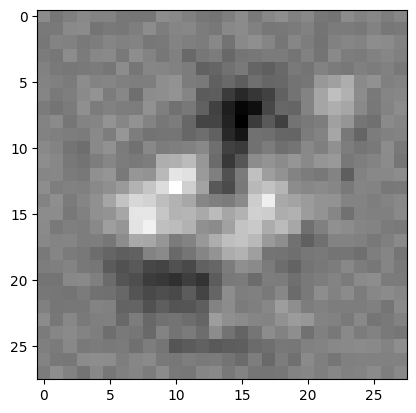

Época[92/100]
weights: torch.Size([10, 784])


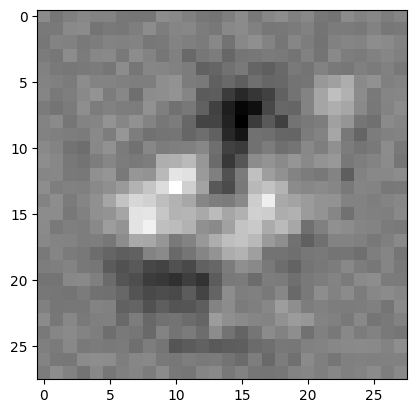

Época[93/100]
weights: torch.Size([10, 784])


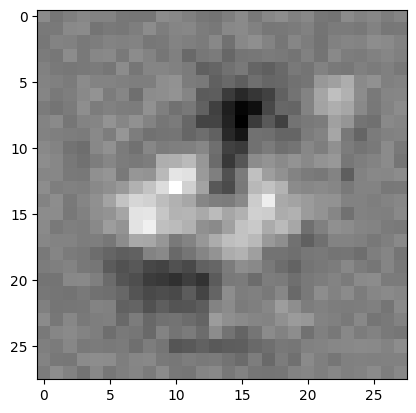

Época[94/100]
weights: torch.Size([10, 784])


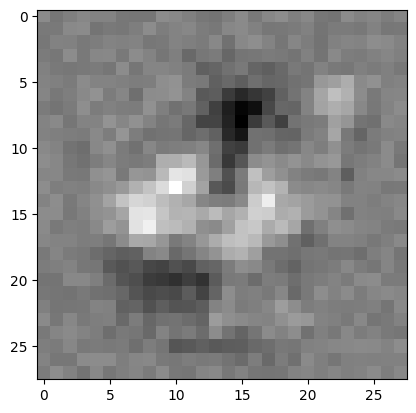

Época[95/100]
weights: torch.Size([10, 784])


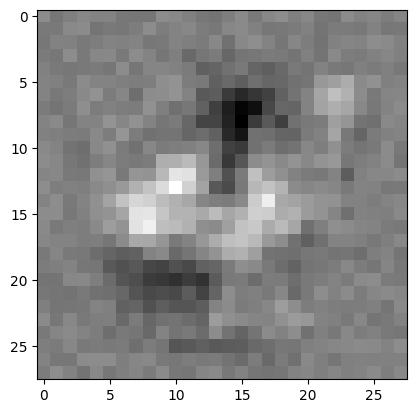

Época[96/100]
weights: torch.Size([10, 784])


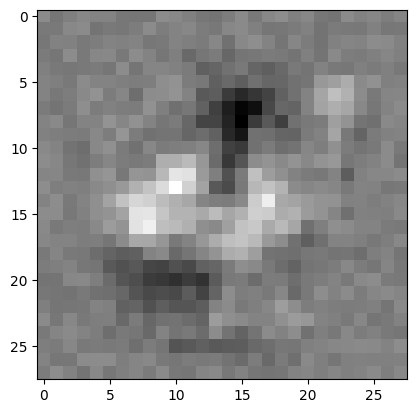

Época[97/100]
weights: torch.Size([10, 784])


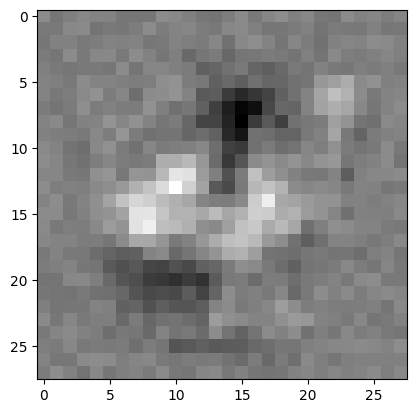

Época[98/100]
weights: torch.Size([10, 784])


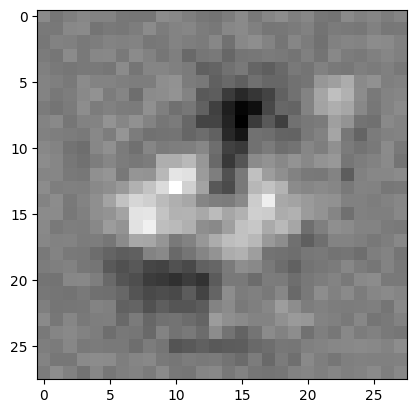

Época[99/100]
weights: torch.Size([10, 784])


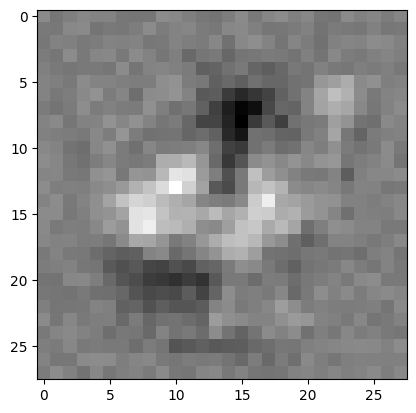

Época[100/100]
weights: torch.Size([10, 784])


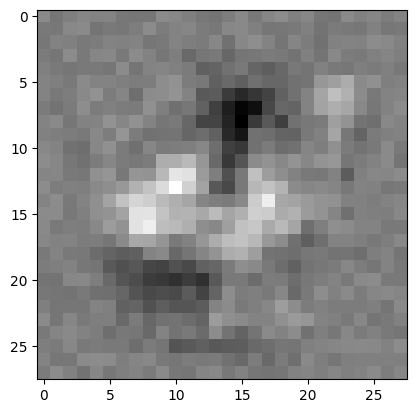

In [ ]:
model2 = torch.nn.Linear(28*28,10)
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model2.parameters(), lr=learningRate)


losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model2(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    print('Época[{}/{}]'.format(i + 1,epochs))

    weights = model2.state_dict()['weight']
    print('weights:', weights.shape)

    # Visualizando pesos da classe 4
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()


<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
2. Qual é o shape da saída da rede?
3. Qual é o número total de parâmetros da rede, incluindo o bias?

# Aprendizados
